#**Project Title : Plant Diseases Detection using Deep Learning Objective**

###Problem Statement:

To develop a robust deep learning model capable of detecting and classifying plant diseases using image data. The model should be able to accurately identify whether a given plant is healthy or diseased and, if diseased, classify it into one of the specific disease categories. This solution aims to assist farmers and agricultural professionals in early and accurate detection of plant diseases, potentially reducing crop loss and improving yield.

###Dataset Description :

The Plant Diseases dataset contains 2,569 images of 13 different plant species. These images are categorized into 30 different classes, including both healthy and diseased labels. There are a total of 8,851 labeled objects within the dataset.

###Key Characteristics :

Total Images: 2,569

Plant Species: 13

Classes: 30 (including healthy and various diseased categories)

Labeled Objects: 8,851

###Import Libraries

In [26]:
import pandas as pd
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout ,GlobalAveragePooling2D
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
import os, shutil
import warnings
warnings.filterwarnings('ignore')

###Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path='/content/drive/MyDrive/project_List/models/All model and dataset/Deep Learning /Classification/Classification/training'
test_path='/content/drive/MyDrive/project_List/models/All model and dataset/Deep Learning /Classification/Classification/test'
valid_path='/content/drive/MyDrive/project_List/models/All model and dataset/Deep Learning /Classification/Classification/validation'

In [4]:
# Function to load and print a single image from each folder
def load_and_print_images(directory, num_columns=3):
    folders = os.listdir(directory)
    num_folders = len(folders)
    num_rows = num_folders // num_columns + (num_folders % num_columns > 0)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))
    fig.suptitle(directory.split('/')[-1] + " Images", fontsize=16, y=1.02)
    axes = axes.flatten()

    for i, folder in enumerate(folders):
        folder_path = os.path.join(directory, folder)
        # Get the first image file in the folder
        image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        if image_files:
            image_path = os.path.join(folder_path, image_files[0])
            # Load image using opencv
            image = cv2.imread(image_path)
            # Display image
            axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            axes[i].set_title(folder, fontsize=14, fontweight='bold', color='black', backgroundcolor='white', pad=10)
            axes[i].set_xlabel(folder, fontsize=12, fontweight='normal', color='black')
            axes[i].axis('off')

    # Hide empty subplots
    for j in range(i+1, num_rows*num_columns):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

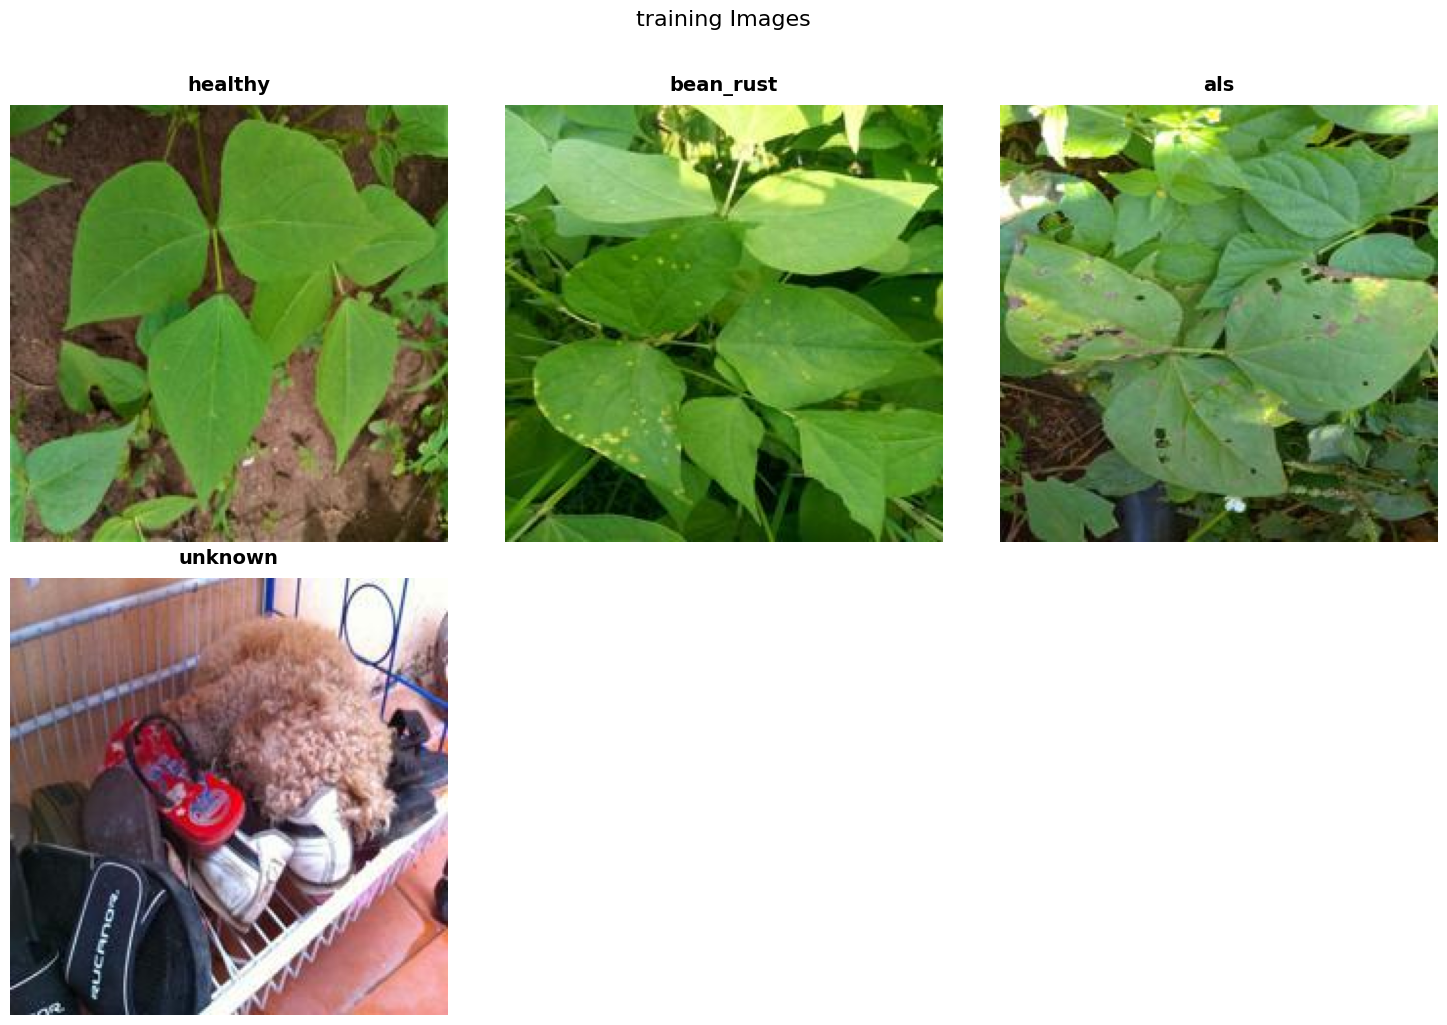

In [5]:
# Load and print images from each directory for train
load_and_print_images(train_path)

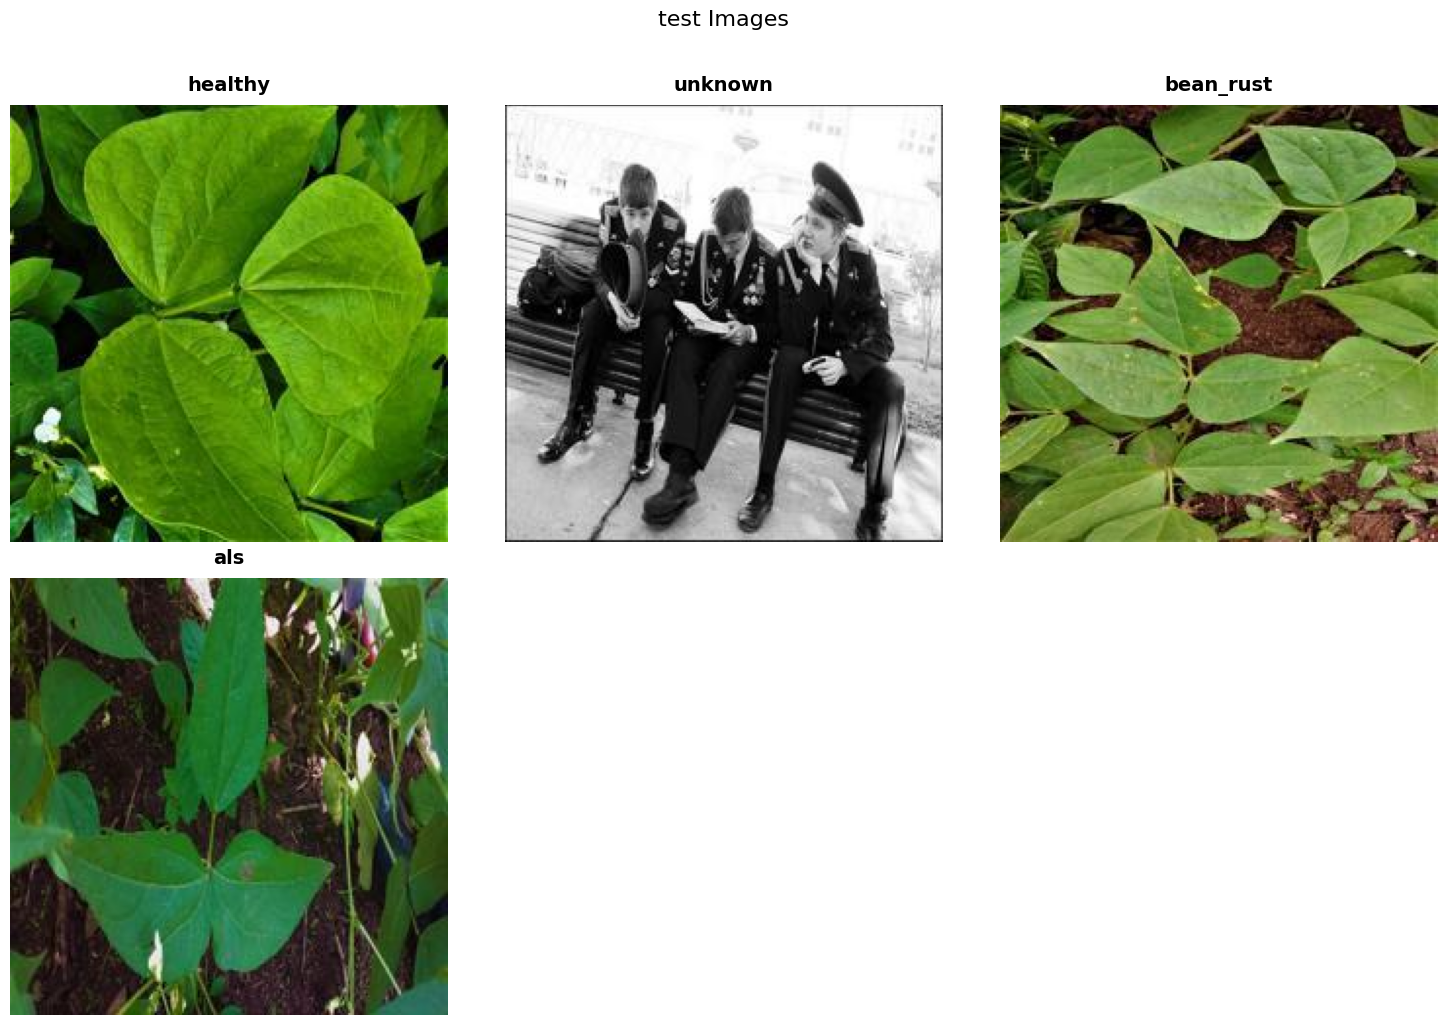

In [6]:
# Load and print images from each directory for train
load_and_print_images(test_path)

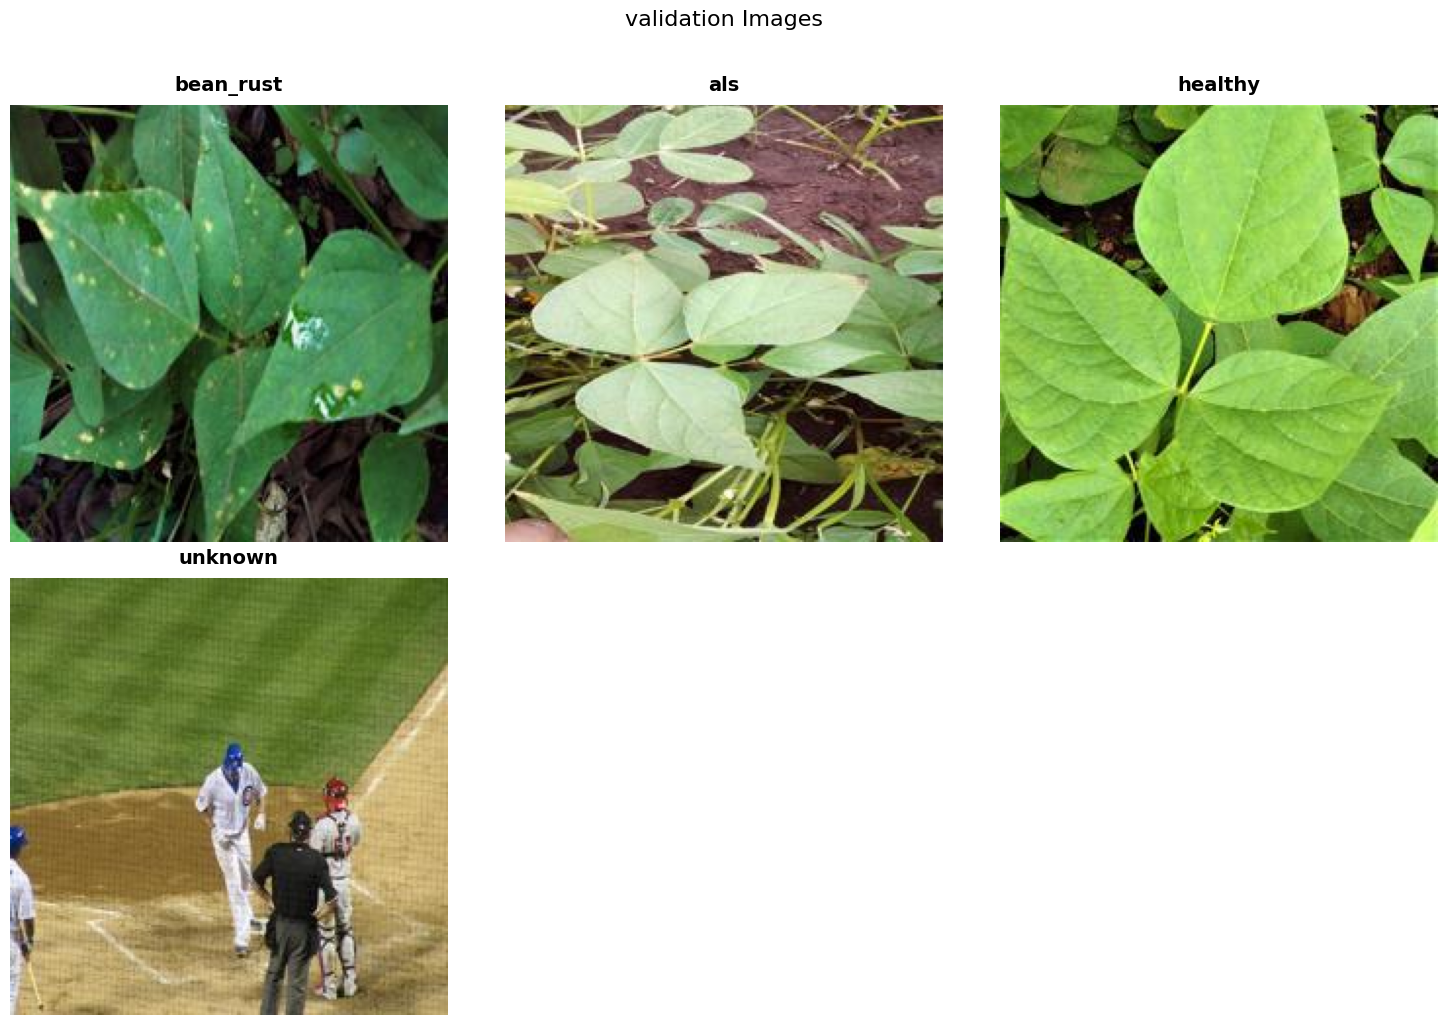

In [7]:
load_and_print_images(valid_path)

<Axes: >

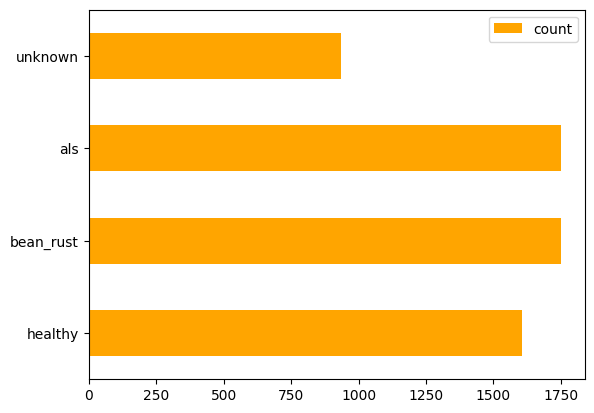

In [8]:
image_categorie_train = os.listdir('/content/drive/MyDrive/project_List/models/All model and dataset/Deep Learning /Classification/Classification/training')
images_length={}
for i, cat in enumerate(image_categorie_train):
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        images_length[cat]=len(images_in_folder)
pd.DataFrame(images_length,index = ['count']).T.plot(kind='barh',color='orange')

<Axes: >

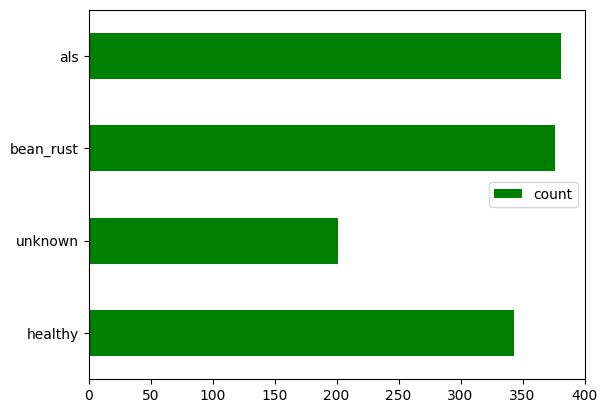

In [9]:
image_categories_test = os.listdir('/content/drive/MyDrive/project_List/models/All model and dataset/Deep Learning /Classification/Classification/test')
images_length={}
for i, cat in enumerate(image_categories_test):
        # Load images for the ith category
        image_path = test_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        images_length[cat]=len(images_in_folder)
pd.DataFrame(images_length,index = ['count']).T.plot(kind='barh',color='green')

<Axes: >

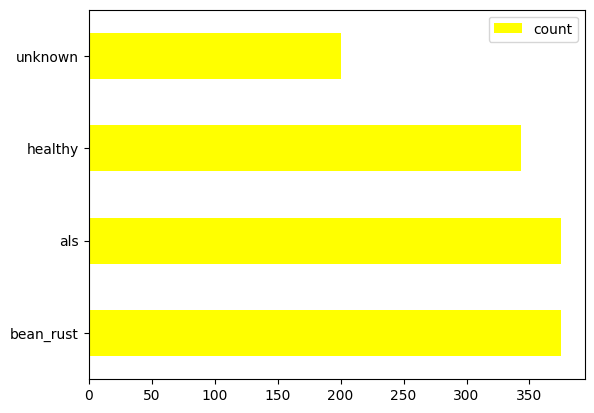

In [10]:
image_categories_validation = os.listdir('/content/drive/MyDrive/project_List/models/All model and dataset/Deep Learning /Classification/Classification/validation')
images_length={}
for i, cat in enumerate(image_categories_validation):
        # Load images for the ith category
        image_path = valid_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        images_length[cat]=len(images_in_folder)
pd.DataFrame(images_length,index = ['count']).T.plot(kind='barh',color='yellow')

###Data Argumentation

In [11]:
print("Train Data: ", end=' ')
train_gen = ImageDataGenerator(
    rescale=1./255,  # Normalize the data
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_image_generator = train_gen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Train Data:  Found 6039 images belonging to 4 classes.


In [12]:
print("Test Data: ", end=' ')
test_gen = ImageDataGenerator(rescale=1./255)
test_image_generator = test_gen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Test Data:  Found 1301 images belonging to 4 classes.


In [13]:
print("Validation Data: ", end=' ')
val_gen = ImageDataGenerator(rescale=1./255)
val_image_generator = val_gen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Validation Data:  Found 1293 images belonging to 4 classes.


###Model architecture

In [14]:
# Define the model architecture
model_le = Sequential()

model_le.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)))
model_le.add(MaxPooling2D(pool_size=(2, 2)))

model_le.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model_le.add(MaxPooling2D(pool_size=(2, 2)))

model_le.add(Flatten())
model_le.add(Dense(1024, activation='relu'))
model_le.add(Dense(128, activation='relu'))
model_le.add(Dense(4, activation='softmax'))

model_le.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 32)      51232     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 89888)             0         
                                                                 
 dense (Dense)               (None, 1024)              9

In [15]:
# Set up Early Stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

In [16]:
# Compile the model
model_le.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [17]:
# Train the model
hist = model_le.fit(train_image_generator,
                    epochs=5,
                    verbose=1,
                    validation_data=val_image_generator,
                    steps_per_epoch=15000//64,
                    validation_steps=3000//64,
                    callbacks=[early_stopping],
                    workers=8)

Epoch 1/5
234/234 [==============================] - 865s 3s/step - loss: 0.9930 - accuracy: 0.5246 - val_loss: 0.8347 - val_accuracy: 0.6312
Epoch 2/5
234/234 [==============================] - 224s 932ms/step - loss: 0.7921 - accuracy: 0.6421 - val_loss: 0.7524 - val_accuracy: 0.6696
Epoch 3/5
234/234 [==============================] - 226s 937ms/step - loss: 0.7115 - accuracy: 0.6847 - val_loss: 0.7074 - val_accuracy: 0.6963
Epoch 4/5
234/234 [==============================] - 226s 938ms/step - loss: 0.6344 - accuracy: 0.7267 - val_loss: 0.6893 - val_accuracy: 0.7104
Epoch 5/5
234/234 [==============================] - 227s 940ms/step - loss: 0.5962 - accuracy: 0.7481 - val_loss: 0.6740 - val_accuracy: 0.7150


###Prediction

In [18]:
# Predict using the trained model
y_pred = model_le.predict(test_image_generator)
predicted_classes = np.argmax(y_pred, axis=1)

21/21 [==============================] - 1001s 50s/step


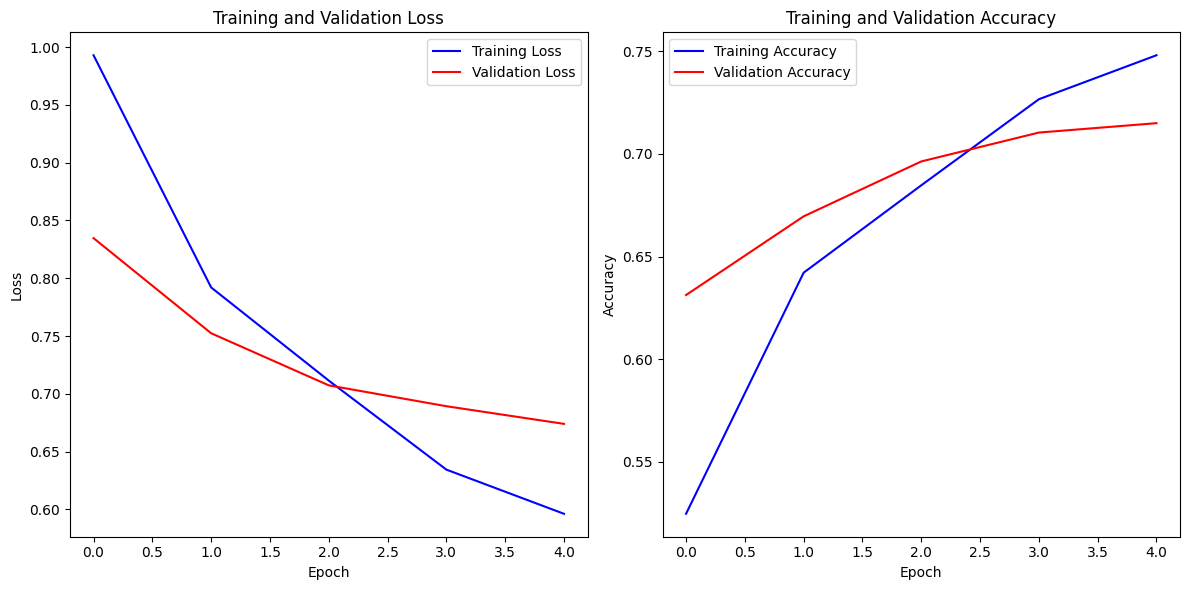

In [19]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss', color='blue')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# Print classification report
print("Classification Report:")
print(classification_report(test_image_generator.classes, predicted_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       381
           1       0.62      0.52      0.56       376
           2       0.65      0.84      0.74       343
           3       0.98      0.98      0.98       201

    accuracy                           0.70      1301
   macro avg       0.73      0.74      0.73      1301
weighted avg       0.70      0.70      0.70      1301



*   Increase the number of epoachs to increase the accuracy

###Save the model

In [29]:
model_le.save('/content/drive/MyDrive/project_List/models/my_model.h5')

In [30]:
loaded_model = load_model('/content/drive/MyDrive/project_List/models/my_model.h5')

In [31]:
# Load the image
image_path = "/content/drive/MyDrive/project_List/models/All model and dataset/Deep Learning /Classification/Classification/test/als/1619082619195.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [32]:
# Preprocess the image
resized_image = cv2.resize(image, (224, 224))
normalized_image = resized_image / 255.0

In [33]:
# Reshape the image to match model's input shape and add batch dimension
input_image = np.expand_dims(normalized_image, axis=0)

In [34]:
# Make predictions
predictions = loaded_model.predict(input_image)

1/1 [==============================] - 0s 275ms/step


In [35]:
# Get the predicted label
predicted_label = np.argmax(predictions)

In [36]:
# Define a dictionary to map class indices to class labels
class_labels = {0: 'unknown', 1: 'healthy', 2: 'bean_rust', 3: 'als'}

In [37]:
# Get the predicted label's corresponding class name
predicted_class_name = class_labels[predicted_label]

In [38]:
print("Predicted Class:", predicted_class_name)

Predicted Class: bean_rust


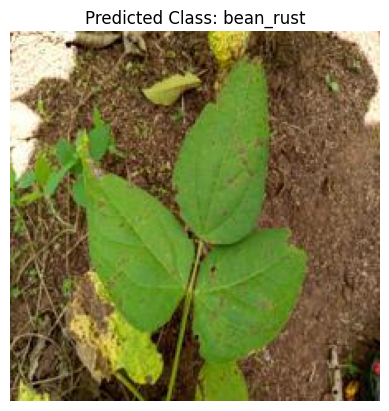

In [39]:
# Display the image with the predicted class label
plt.imshow(image)
plt.title("Predicted Class: " + predicted_class_name)
plt.axis('off')
plt.show()

###Conclusion :

In this project, we successfully developed a deep learning model for detecting and classifying plant diseases using image data. The model was trained on a comprehensive dataset comprising 2,569 images from 13 different plant species, categorized into 30 classes, including both healthy and various diseased labels. The key objective was to create a tool that could accurately identify whether a plant is healthy or diseased, and if diseased, correctly classify the type of disease.

Our model demonstrated promising results, providing a robust solution for early and accurate detection of plant diseases. This capability is crucial for farmers and agricultural professionals as it can significantly reduce crop loss and enhance yield by enabling timely intervention.

To further improve the model's accuracy, increasing the number of training epochs can be a beneficial step. More epochs allow the model to learn more effectively from the data, potentially leading to better performance and higher precision in disease classification.

Overall, this project underscores the potential of deep learning in agricultural applications, offering a practical tool for enhancing crop health and productivity through advanced disease detection.